Renormalizing the Mandelbrot Escape
Anyone who has ever scratched the surface of the Mandelbrot set knows that it involves counting to infinity. Counting to infinity is rarely a light undertaking, and doing so often leaves the counter unsatisfied. For those imaging the Mandelbrot Set, this count is usually avoided by introducing the concepts of "maximum iterations" and an "escape radius". The technically minded often wonder what a change in the escape radius will do; while the artistically minded cannot help but notice that the number of iterations until escape is an integer, resulting in a stair-step function that is not always visually appealing.
It is not widely known that a smooth fractional iteration count can be defined and easily applied. Its definition is not at all difficult; the theory behind it, however, is a bit mathematical at times. We present one derivation, and some results below. An alternate derivation, using the technique of Spectral Analysis of Eigenvalues in Hilbert spaces, is here. Spectral analysis allows one to define a unique, smooth, invariant fractional iteration count that accurately describes the result of counting (with integers!) until infinity.

The smooth iteration count has several uses, not the least of which is the generation of nice, smooth pictures, as shown below. Another utility comes through its close connection to the Douady-Hubbard potential and external rays.

The Theory
Consider the traditional iterated Mandelbrot Set equation:
      int iter_count = 0;
      float escape_radius = 20.0;
      complex Z, C;
      loop (forever) {
         Z = Z*Z +C;
         iter_count ++;
         float modulus = sqrt (ReZ*ReZ + ImZ*ImZ);
         if (modulus > escape_radius) goto stop;
         if (iter_count > maxiter) goto stop;
      }
   
   stop:
      color_value = colormap_lookup (iter_count);
      draw_pixel;
It can be clearly seen that the iteration count in this traditional algorithm is integer-valued, and that the actual value depends on the choice of the escape radius.
The scale-dependence on the escape radius can be (partly) removed by differentiating the above formula with respect to the escape radius, taking the limit to infinity, and then integrating the first term of the resulting differential equation. The result is a renormalized, scale-independent, quasi-integral-valued iteration count:

      m = iter_count - log (log escape_radius) /log 2
In the above, m still changes by integer values; however, it can be seen that it is roughly independent of the escape radius: increasing the escape radius will on average increase the iteration count as well, and the two will cancel each other out.
Next, let's look for the fractional iteration count. As the escaped values of Z are iterated and diverge to infinity, the behavior eventually becomes quite simple: Z(n) = X ^ 2 ^ n for some value of X. The dependence on n is simple; the dependence of Z on n can be gotten by taking the logarithm. In a fashion similar to that above, we can deduce that

      1 > m + log (log |X|) / log 2 > 0
where m is the renormalized iteration count above, and |X| is the modulus of the complex-number valued X in the equation above.
It is now a simple matter to put these two terms together to obtain the fully-renormalized fractional iteration count:

      mu = m + frac = n + 1 - log (log  |Z(n)|) / log 2
where n is the number of iterations needed to exceed the escape radius, and |Z(n)| is the modulus of the iterate just after it escapes. That is, |Z(n)| > R > |Z(n-1)| were R is the escape radius. In the above formula, the value of mu is almost completely independent of the iteration count, and of the escape radius, despite the fact that the right-hand-side of the equation is explicitly dependent on both of these quantities. The renormalized iteration count mu depends only on C, and is a piecewise-continuous, differentiable function thereof. By using a different analysis, it can be seen that the renormalized iteration count mu is in fact the residue remaining when a pole (due to the infinite sum) is removed. That is, the value of mu closely approximates the result of having iterated to infinity, that is, of having an infinite escape radius, and an infinite max_iter.
The formula above is clearly numerically tractable, and can be easily coded up into a computer program, without presenting any special challenges whatsoever. Some sample results are shown below.

The function above is discontinuous; the locations of the discontinuities are shown in the bottom-most figure below. An estimate of the size of the discontinuity is easily computed. Consider a value of C such that |Z(n)| = R - epsilon. Then

      mu(R) = n + 1 - log log |Z(n)^2 +C| / log 2
and
      mu(R-2*epsilon) = n - log log |Z(n)| / log 2
For |Z(n)| > > |C|, we have
      |Z(n)^2 + C| = |Z(n)|^2 * (1 + Re (C/Z(n)^2))
thus yielding
      mu(R) - mu(R-2*epsilon) = Re ( C / (Z(n)*Z(n)) )  /  ( 2 * log |Z(n)| * log (2) )
Although the above indicates that the error term decreases quadratically as the escape radius is increases, it is important to note that the error term decreases as a double-exponential of the number of iterations past the escape radius. That is, if instead of the mu defined above, we use the formula
      mu' = n + 5 - log (log  |Z(n+4)|) / log 2
and an escape radius of 10, then the error is approximately one part in 1.0e32 -- miniscule indeed, and with each additional iteration shrinking by a square again.
The author has attempted vainly, and in vain, to discover the continuous-everywhere analogue of mu. However, this appears to be more difficult than it first appears, even as it appears to be tantalizingly simple. Note that a series expansion of additional correction terms is possible (these terms contain factors of the form Re (c/z^2)) but tedious. Indeed, the same results can be far more easily achieved simply by iterating few more times! Due to the extremely rapid convergence that is possible by iterating a few more times, a series expansion makes no sense.

A different derivation of the above results, using regulated sums, lies here.
Iterating Different Equations
The above formulas apply only to the Mandelbrot iterate. Other iterates require modified equations. The corresponding results are easy to get. If the iterated equation is of the form
Z(n) = Z(n-1) ^ p + lower-power-terms
where ^ denotes exponentiation, and p is the highest power of Z occurring in the iterated equation, then
mu = n + 1 - log (log  |Z(n)|) / log p
A Simplified Explanation
The following simplified and very insightful explanation is provided by Earl L. Hinrichs:
"Ignoring the +C in the usual formula, the orbit point grows by Z := Z^2. So we have the progression Z, Z^2, Z^4, Z^8, Z^16, etc. Iteration counting amounts to assigning an integer to these values. Ignoring a multiplier, the log of this sequence is: 1, 2, 4, 8, 16. The log-log is 0, 1, 2, 3, 4 which matches the integer value from the iteration counting. So the appropriate generalization of the discrete iteration counting to a continuous function would be the double log."

This simplified explanation also provides a simple insight into why a division by the logarithm of the power is required: consider iterating Z := Z^3. The log of the sequence yields 1, 3, 9, 27, 81, 243 ... and the double-log yields 0, log(3), 2log(3), 3log(3), 4log(3), ....

The Revised Algorithm
Just to make it clear what these formulas mean, we present the revised algorithm that employs them. Only two lines are changed:
      int iter_count = 0;
      float escape_radius = 20.0;
      complex Z, C;
      loop (forever) {
         Z = Z*Z +C;
         iter_count ++;
         float modulus = sqrt (ReZ*ReZ + ImZ*ImZ);
         if (modulus > escape_radius) goto stop;
         if (iter_count > maxiter) goto stop;
      }
   
   stop:
      Z = Z*Z +C; iter_count ++;    // a couple of extra iterations helps
      Z = Z*Z +C; iter_count ++;    // decrease the size of the error term.
      float modulus = sqrt (ReZ*ReZ + ImZ*ImZ);
      float mu = iter_count - (log (log (modulus)))/ log (2.0);
      color_value = colormap_lookup (mu);
      draw_pixel (C, color_value);

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

size = 400
iterations = 100

def mandelbrot_python(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j + 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

m = mandelbrot_python(size, iterations)

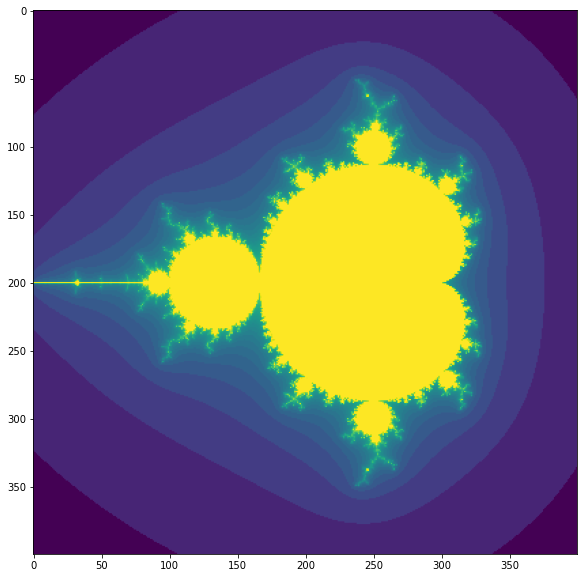

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(m))
plt.show()

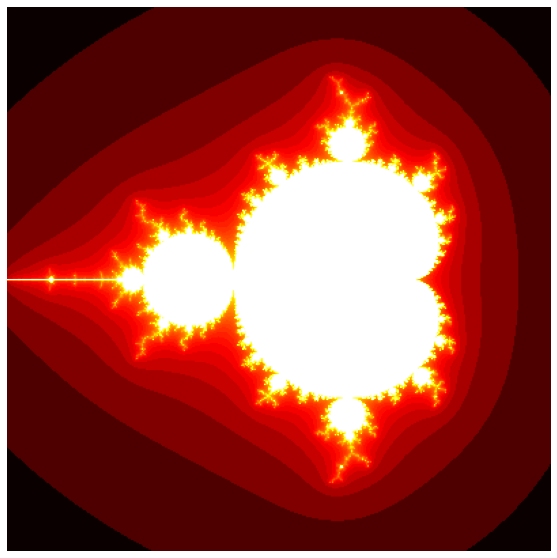

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(m), cmap=plt.cm.hot)
ax.set_axis_off()

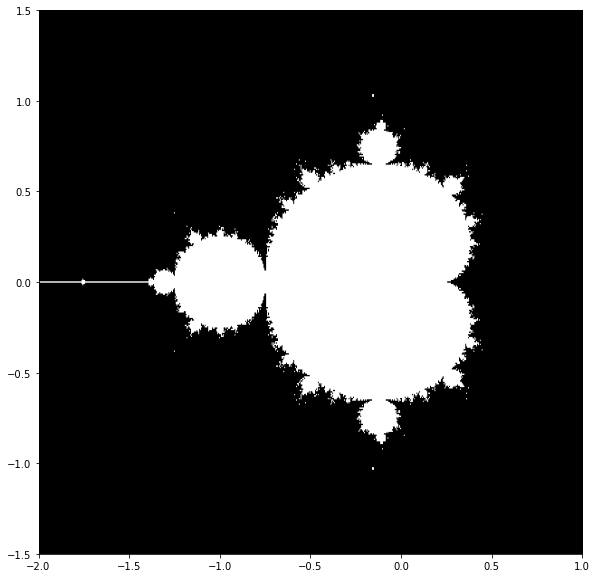

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)

    c = x[:,newaxis] + 1j*y[newaxis,:]

    # Mandelbrot iteration

    z = c

    # The code below overflows in many regions of the x-y grid, suppress
    # warnings temporarily
    with np.warnings.catch_warnings():
        np.warnings.simplefilter("ignore")
        for j in range(N_max):
            z = z**2 + c
        mandelbrot_set = (abs(z) < some_threshold)

    return mandelbrot_set

mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)
plt.figure(figsize=(10,10))
plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()
plt.show()

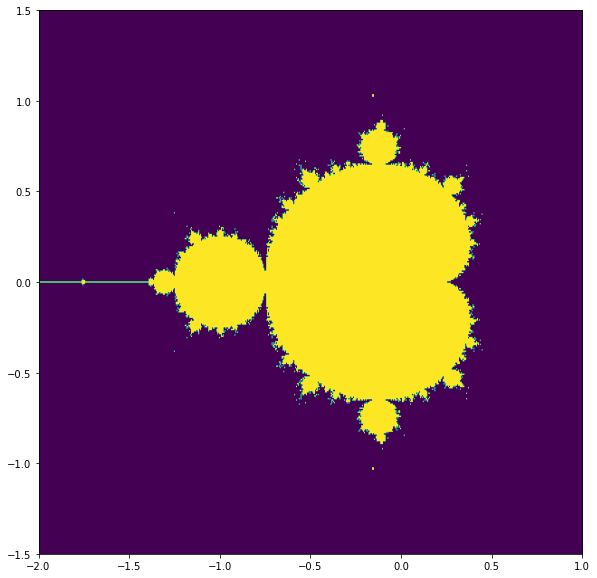

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)

    c = x[:,newaxis] + 1j*y[newaxis,:]

    # Mandelbrot iteration

    z = c

    # The code below overflows in many regions of the x-y grid, suppress
    # warnings temporarily
    with np.warnings.catch_warnings():
        np.warnings.simplefilter("ignore")
        for j in range(N_max):
            z = z**2 + c
        mandelbrot_set = (abs(z) < some_threshold)

    return mandelbrot_set

mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)
plt.figure(figsize=(10,10))
plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.show()

clock time: 36.868906021118164


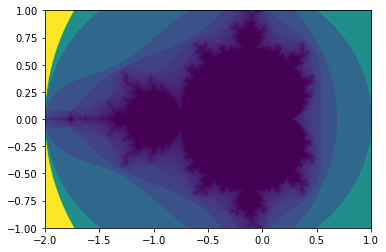

In [2]:
from scipy import *
from pylab import *
import time

def Mand(z0, max_steps):
    z = 0j
    for itr in range(max_steps):
        if abs(z)>2.:
            return itr
        z = z*z + z0
    return max_steps

if __name__ == '__main__':

    Nx = 1000
    Ny = 1000
    max_steps = 1000 #50

    ext = [-2,1,-1,1]
    t0 = time.time()
    
    data = zeros( (Nx,Ny) )

    for i in range(Nx):
        for j in range(Ny):
            x = ext[0] + (ext[1]-ext[0])*i/(Nx-1.)
            y = ext[2] + (ext[3]-ext[2])*j/(Ny-1.)
            data[i,j] = Mand(x + y*1j, max_steps)
    print ('clock time: '+str( time.time()-t0) )
    imshow(transpose(1./data), extent=ext)
    show()

Python:  2.150655508041382


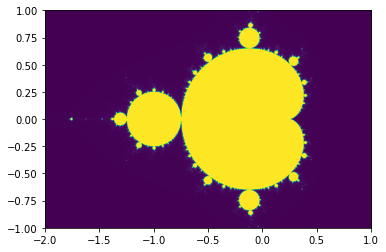

In [3]:
from scipy import *
from numpy import *
from pylab import *
import time
from numba import jit  # This is the new line with numba
        
@jit(nopython=True)    # This is the second new line with numba
def MandNumba(ext, max_steps, Nx, Ny):
    data = ones( (Nx,Ny) )*max_steps
    for i in range(Nx):
        for j in range(Ny):
            x = ext[0] + (ext[1]-ext[0])*i/(Nx-1.)
            y = ext[2] + (ext[3]-ext[2])*j/(Ny-1.)
            z0 = x+y*1j
            z = 0j
            for itr in range(max_steps):
                if abs(z)>2.:
                    data[j,i]=itr
                    break
                z = z*z + z0
    return data

def ax_update(ax):  # actual plotting routine
    ax.set_autoscale_on(False) # Otherwise, infinite loop
    # Get the range for the new area
    xstart, ystart, xdelta, ydelta = ax.viewLim.bounds
    xend = xstart + xdelta
    yend = ystart + ydelta
    ext=array([xstart,xend,ystart,yend])
    data = MandNumba(ext, max_steps, Nx, Ny) # actually producing new fractal
    
    # Update the image object with our new data and extent
    im = ax.images[-1]  # take the latest object
    im.set_data(data)   # update it with new data
    im.set_extent(ext)           # change the extent
    ax.figure.canvas.draw_idle() # finally redraw

if __name__ == '__main__':
    Nx = 1000
    Ny = 1000
    max_steps = 1000 # 50

    ext = [-2,1,-1,1]
    
    t0 = time.time()    
    data = MandNumba(array(ext), max_steps, Nx, Ny)
    t1 = time.time()
    print('Python: ', t1-t0)

    #imshow(1./data, extent=ext)
    fig,ax=subplots(1,1)
    ax.imshow(data, extent=ext,aspect='equal',origin='lower')
    
    ax.callbacks.connect('xlim_changed', ax_update)
    ax.callbacks.connect('ylim_changed', ax_update)
    
    show()

Python:  1.9078938961029053


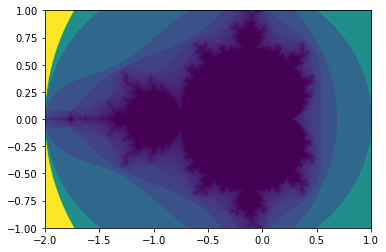

In [4]:
from scipy import *
from numpy import *
from pylab import *
import time
from numba import jit  # This is the new line with numba
        
@jit(nopython=True)    # This is the second new line with numba
def MandNumba(ext, max_steps, Nx, Ny):
    data = ones( (Nx,Ny) )*max_steps
    for i in range(Nx):
        for j in range(Ny):
            x = ext[0] + (ext[1]-ext[0])*i/(Nx-1.)
            y = ext[2] + (ext[3]-ext[2])*j/(Ny-1.)
            z0 = x+y*1j
            z = 0j
            for itr in range(max_steps):
                if abs(z)>2.:
                    data[j,i]=itr
                    break
                z = z*z + z0
    return data

if __name__ == '__main__':
    Nx = 1000
    Ny = 1000
    max_steps = 1000 # 50

    ext = [-2,1,-1,1]
    
    t0 = time.time()    
    data = MandNumba(array(ext), max_steps, Nx, Ny)
    t1 = time.time()
    print('Python: ', t1-t0)

    imshow(1./data, extent=ext)
    show()

In [43]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import roberts, sobel

plt.rcParams['font.size'] = 20
plt.rcParams['text.usetex'] = True
plt.rcParams['legend.fontsize'] = 20
plt.rcParams["figure.figsize"] = (10,10)

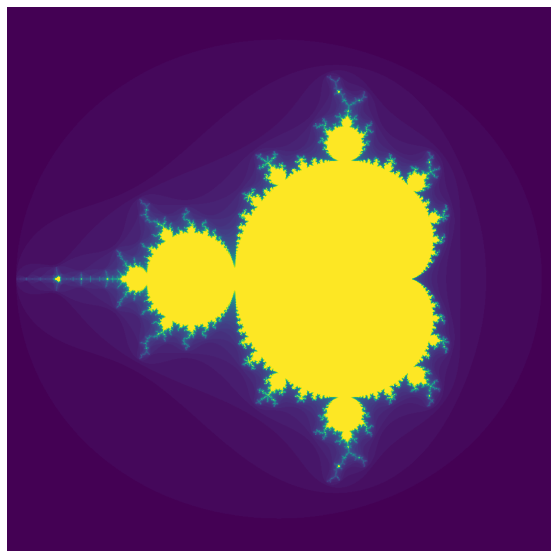

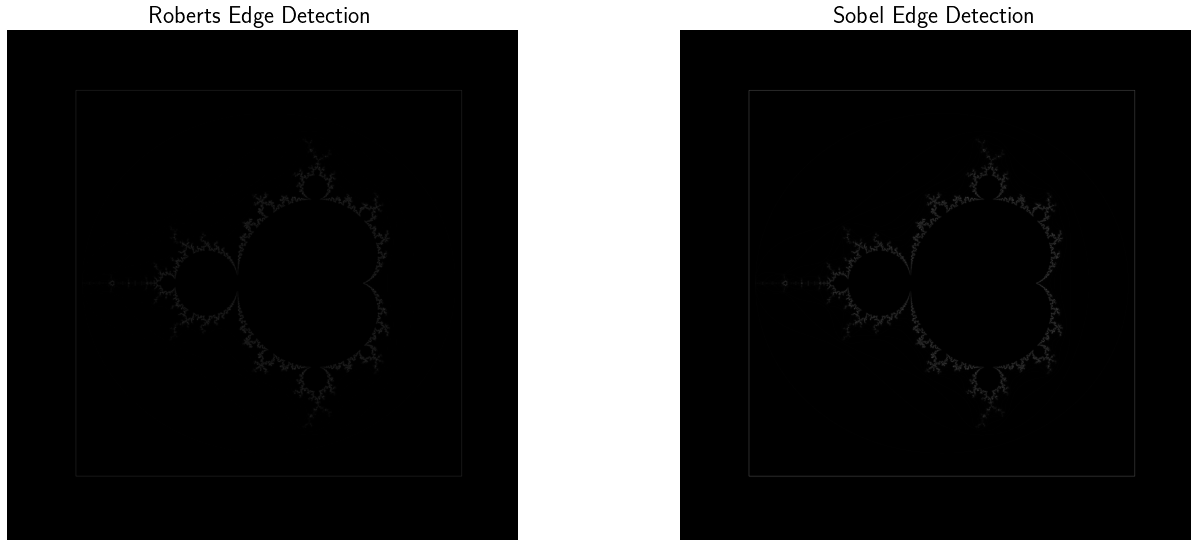

In [44]:
xmin, xmax = -2.05, 1.05
ymin, ymax = -1.5, 1.5
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 1000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot1.jpg', dpi=600)

lena = rgb2gray(io.imread('Mandelbrot1.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

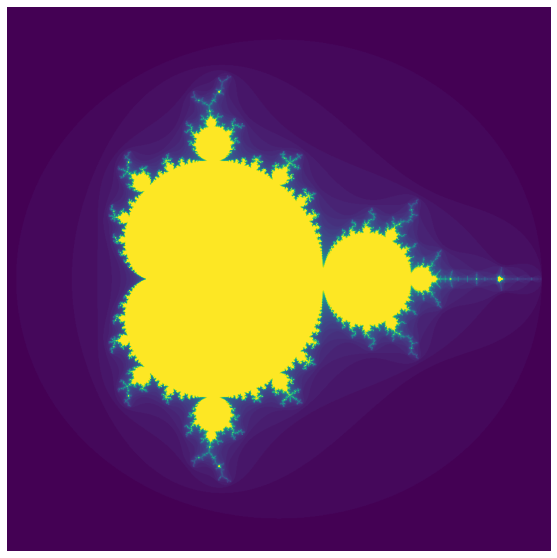

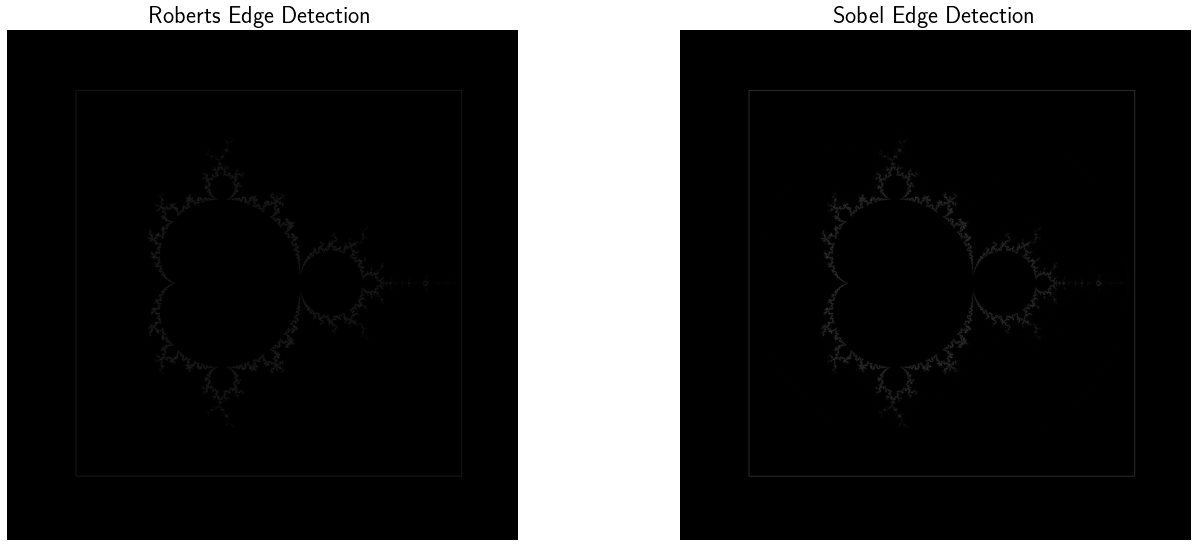

In [45]:
xmin, xmax = -1.05, 2.05
ymin, ymax = -1.5, 1.5
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = c - z**2
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 1000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot2.jpg', dpi=600)
lena = rgb2gray(io.imread('Mandelbrot2.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

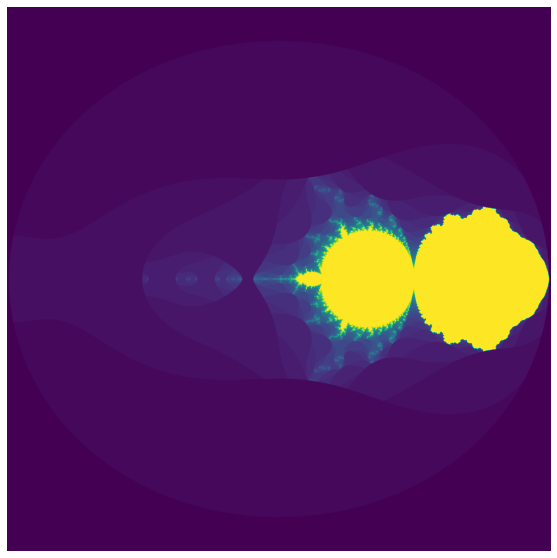

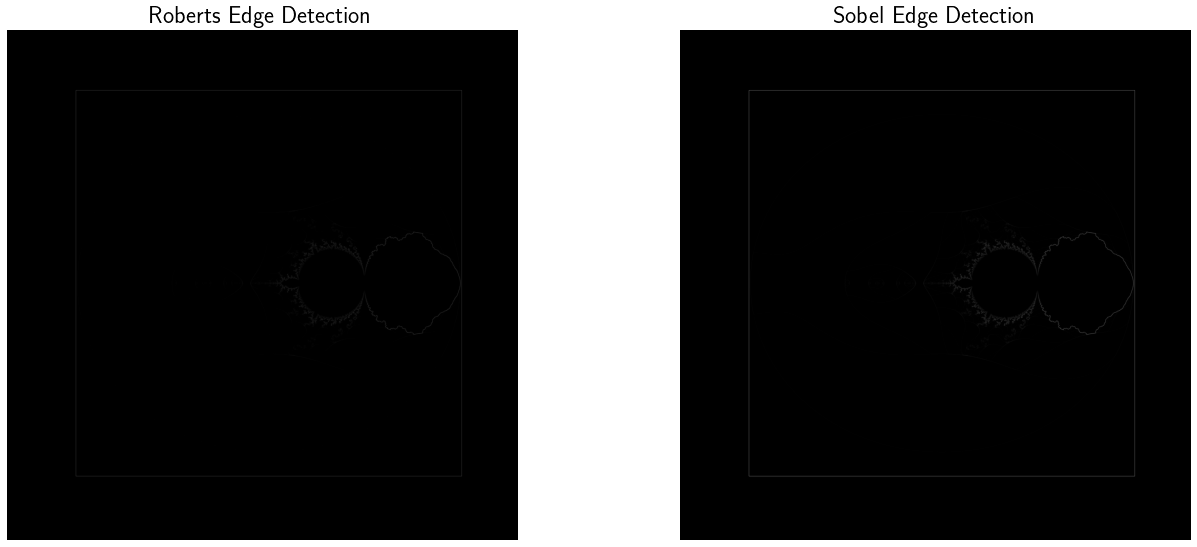

In [46]:
xmin, xmax = -1.01, 2.01
ymin, ymax = -1.51, 1.51
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 -2*z + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 2000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot3.jpg', dpi=600)

plt.imshow(mandelbrot(scale,scale))

lena = rgb2gray(io.imread('Mandelbrot3.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

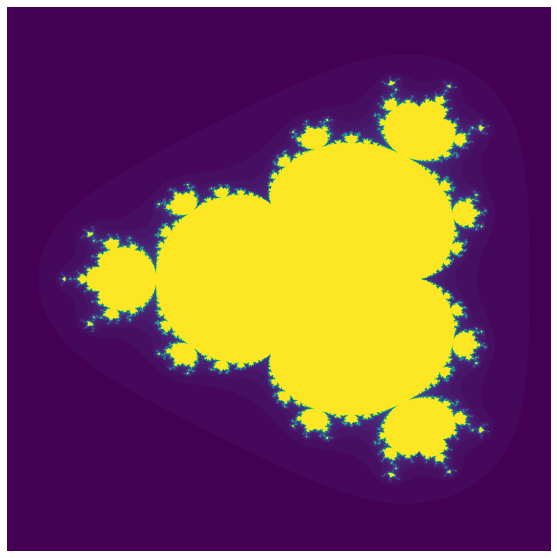

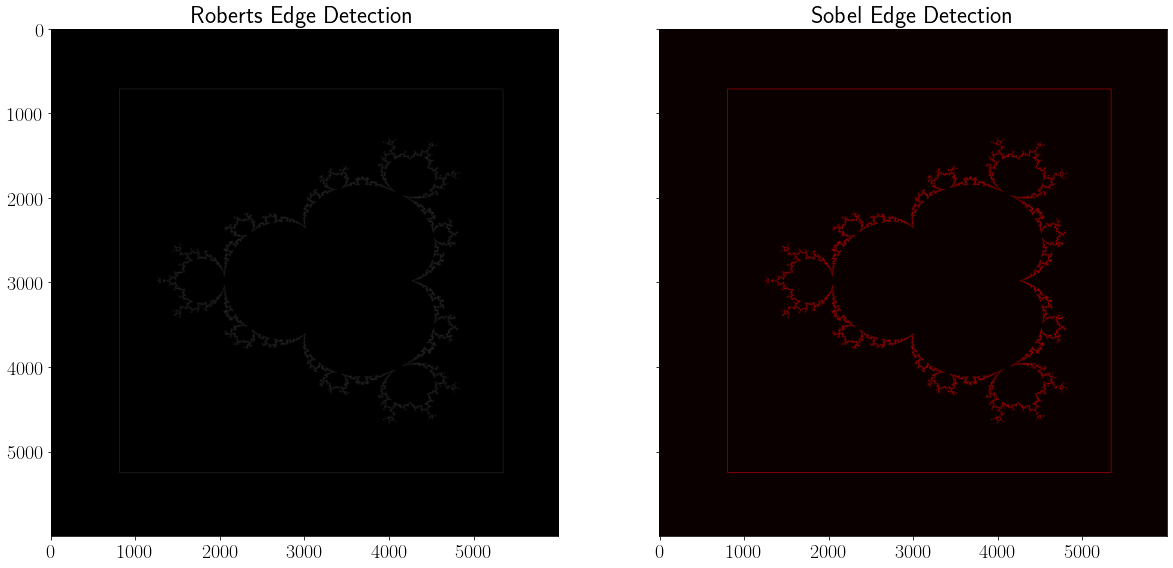

In [47]:
xmin, xmax = -1.5, 1.1
ymin, ymax = -1.5, 1.5
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**4 + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 1000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot4.jpg', dpi=600)

lena = rgb2gray(io.imread('Mandelbrot4.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,18))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.hot)
ax[1].set_title('Sobel Edge Detection')
plt.show()

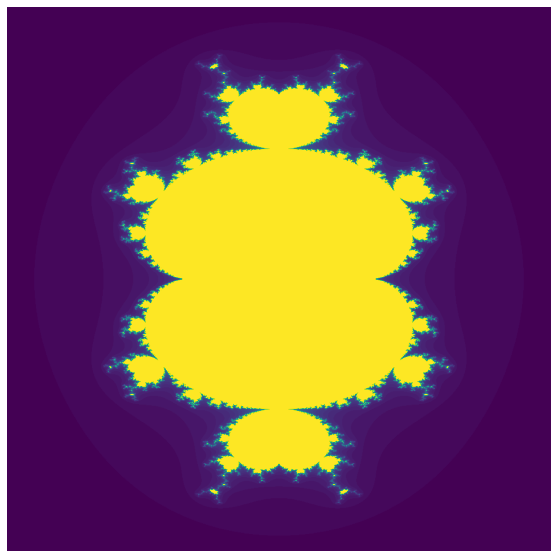

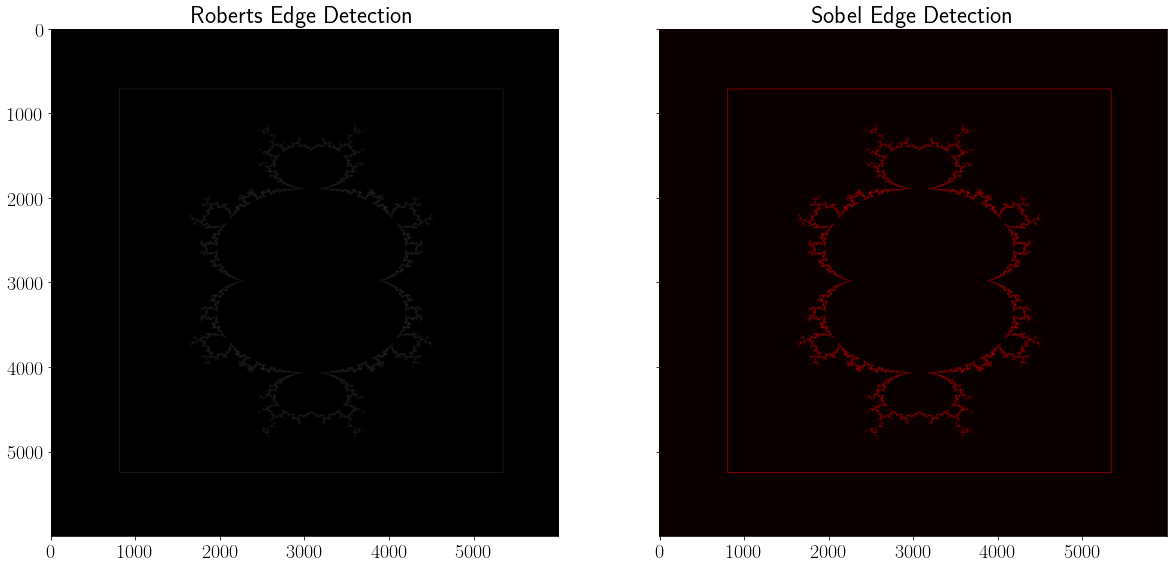

In [48]:
xmin, xmax = -1.11, 1.11
ymin, ymax = -1.61, 1.61
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**3 + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 1000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot5.jpg', dpi=600)
lena = rgb2gray(io.imread('Mandelbrot5.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,18))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.hot)
ax[1].set_title('Sobel Edge Detection')
plt.show()

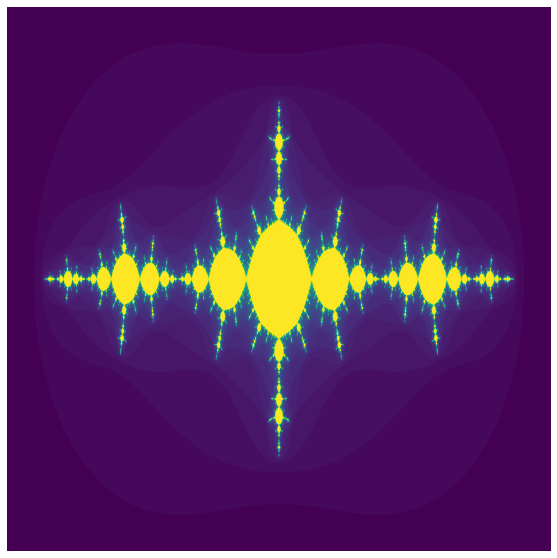

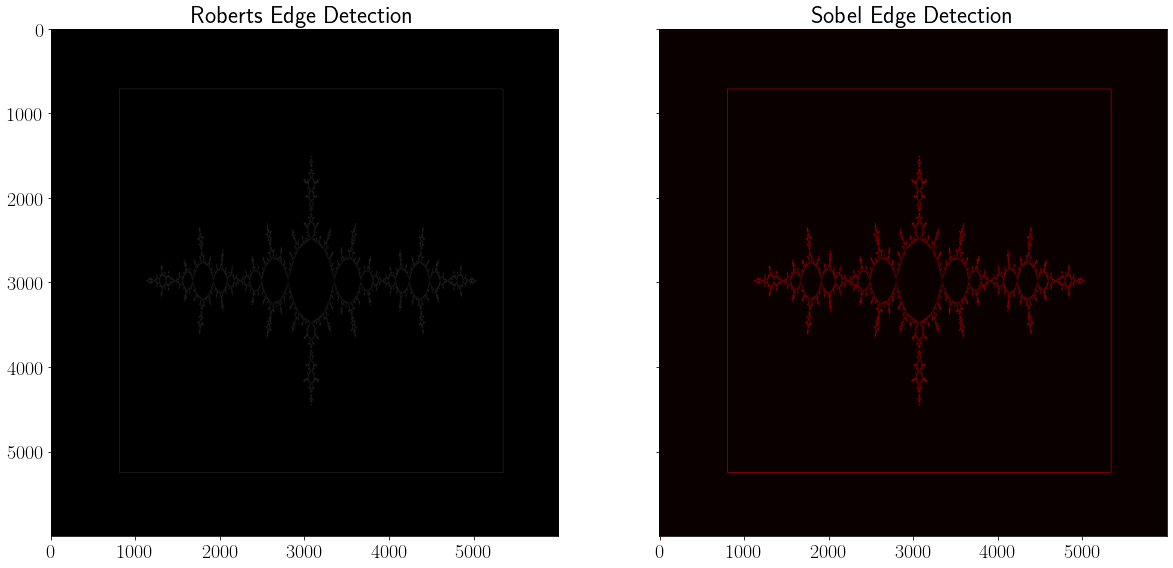

In [49]:
xmin, xmax = -2.01, 2.01
ymin, ymax = -1.01, 1.01
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 - 1.3
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 1000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot6.jpg', dpi=600)
lena = rgb2gray(io.imread('Mandelbrot6.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,18))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.hot)
ax[1].set_title('Sobel Edge Detection')
plt.show()

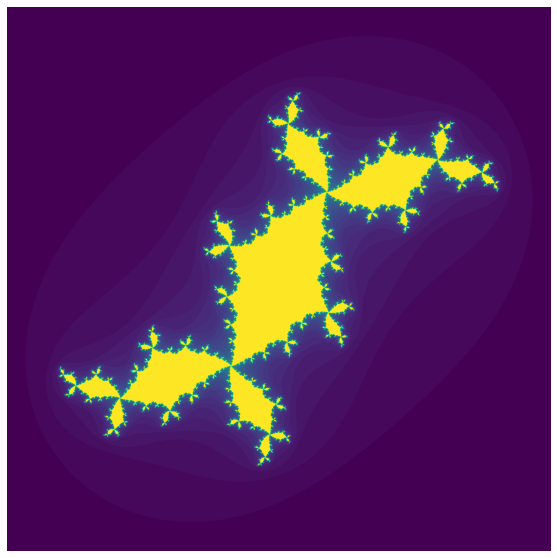

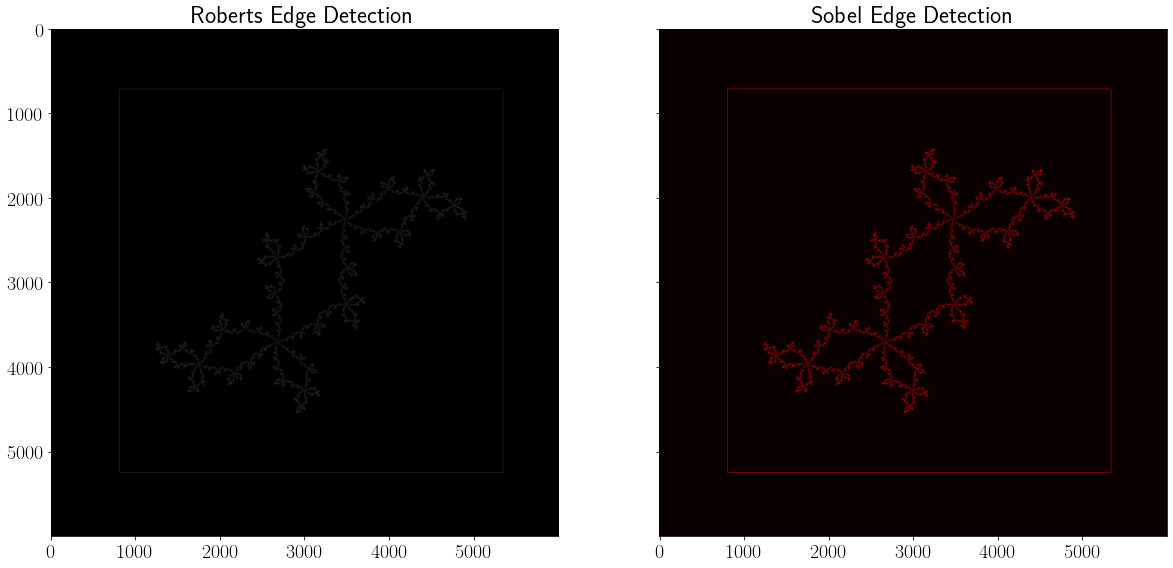

In [50]:
xmin, xmax = -1.6, 1.6
ymin, ymax = -1.6, 1.6
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 -.1+0.8*1j
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 3000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot7.jpg', dpi=600)
lena = rgb2gray(io.imread('Mandelbrot7.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,18))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.hot)
ax[1].set_title('Sobel Edge Detection')
plt.show()

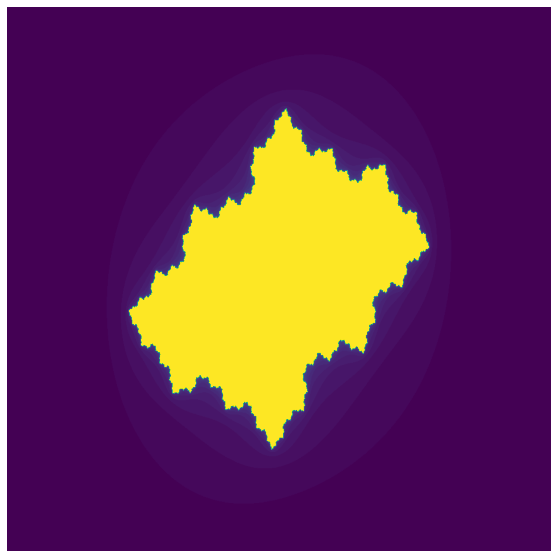

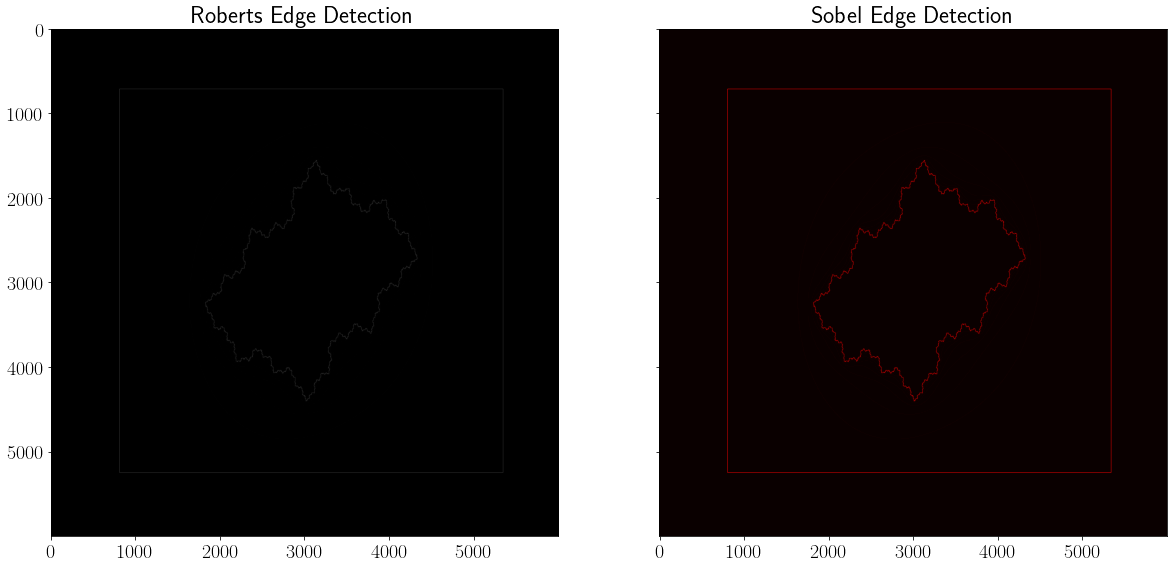

In [51]:
xmin, xmax = -2.5, 2.5
ymin, ymax = -1.5, 1.5
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 - 0.5 + 0.3*1j
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 1000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot8.jpg', dpi=600)
lena = rgb2gray(io.imread('Mandelbrot8.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,18))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.hot)
ax[1].set_title('Sobel Edge Detection')
plt.show()

Text(0.5, 1.0, 'Sobel Edge Detection')

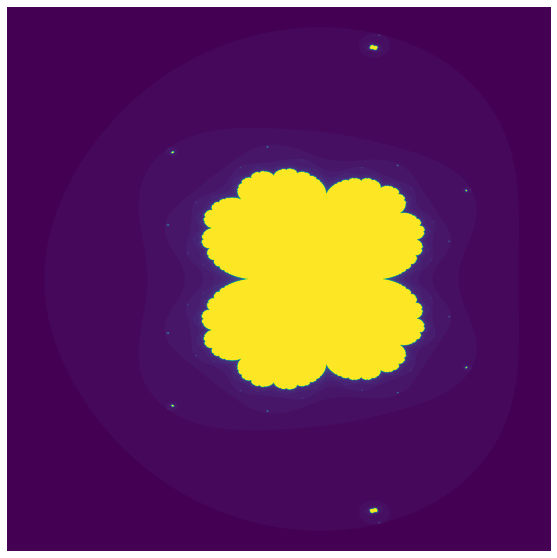

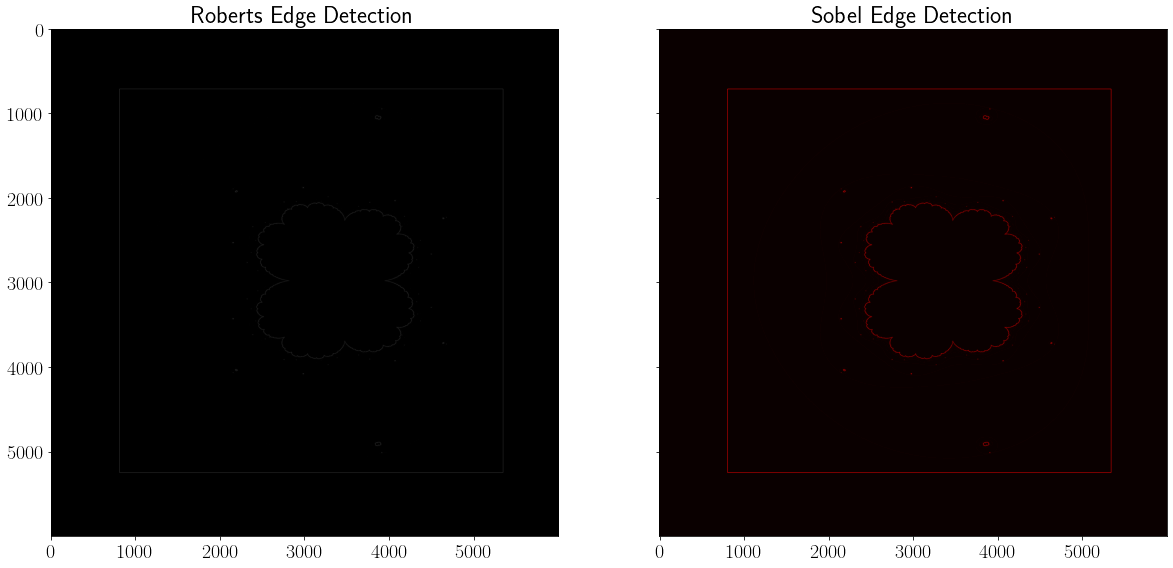

In [52]:
xmin, xmax = -0.11, 1.51
ymin, ymax = -1.11, 1.11
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**3 -2*z + 2
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 2000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
#plt.savefig('Mandelbrot.png', dpi=150)

plt.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot9.jpg', dpi=600)
lena = rgb2gray(io.imread('Mandelbrot9.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,18))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.hot)
ax[1].set_title('Sobel Edge Detection')

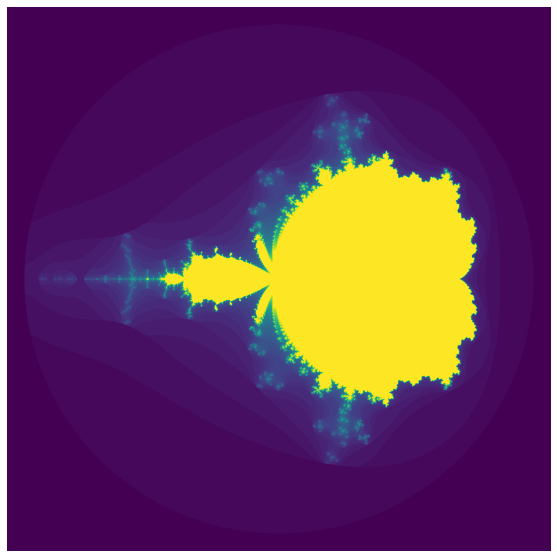

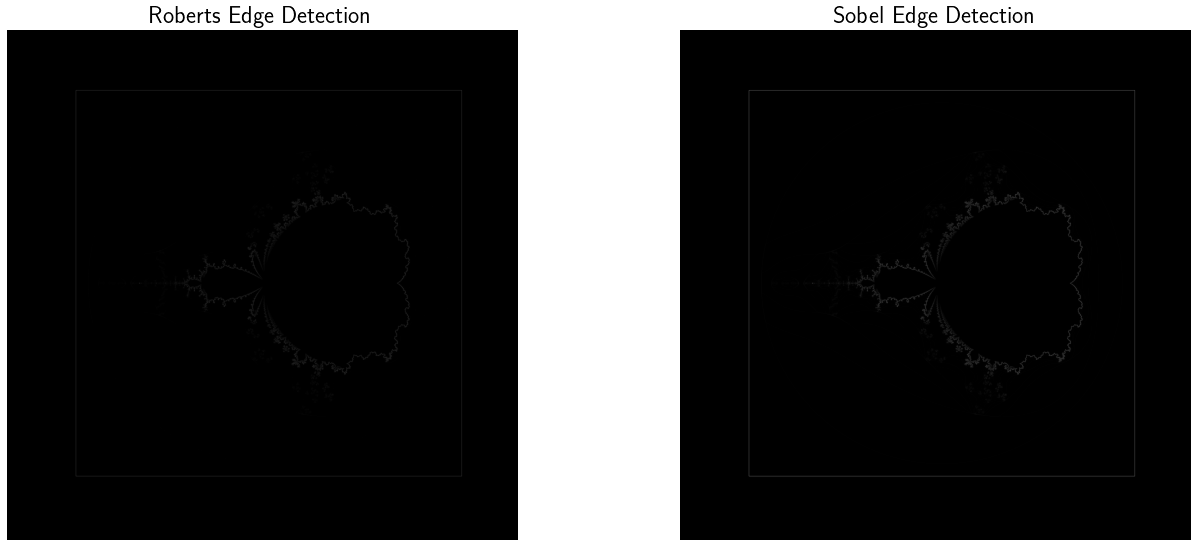

In [53]:
xmin, xmax = -1.51, 1.51
ymin, ymax = -1.51, 1.51
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 - z + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 2000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot10.jpg', dpi=600)

plt.imshow(mandelbrot(scale,scale))

lena = rgb2gray(io.imread('Mandelbrot10.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

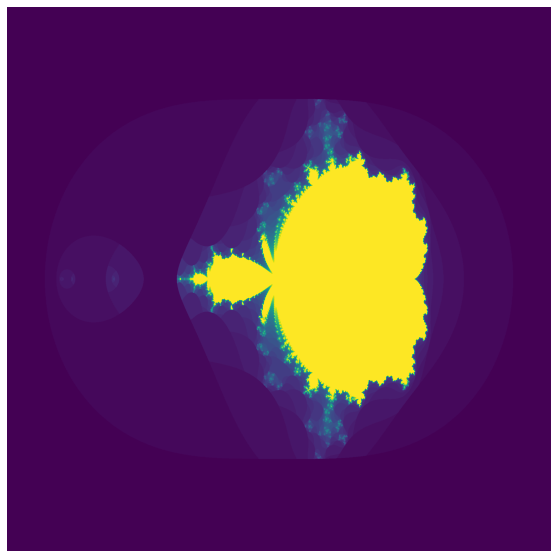

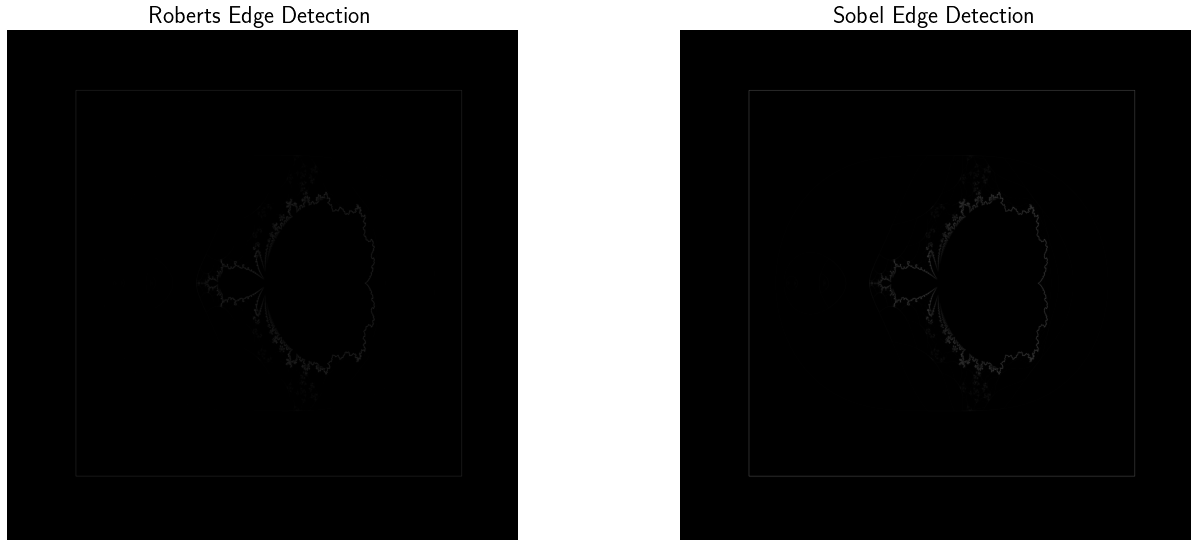

In [54]:
xmin, xmax = -3.01, 1.01
ymin, ymax = -1.51, 1.51
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 + z + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 2000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot11.jpg', dpi=600)

plt.imshow(mandelbrot(scale,scale))

lena = rgb2gray(io.imread('Mandelbrot11.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

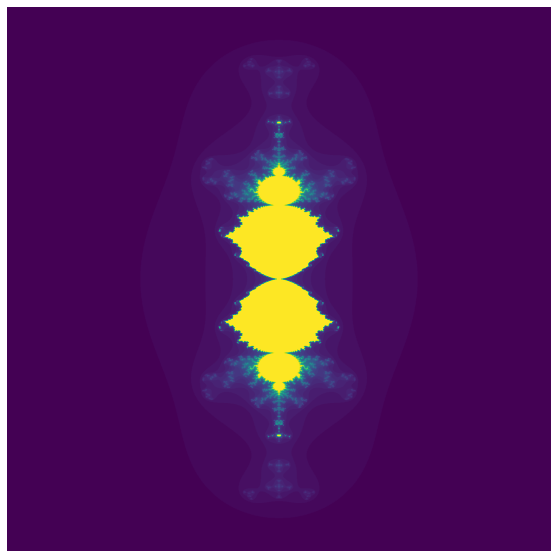

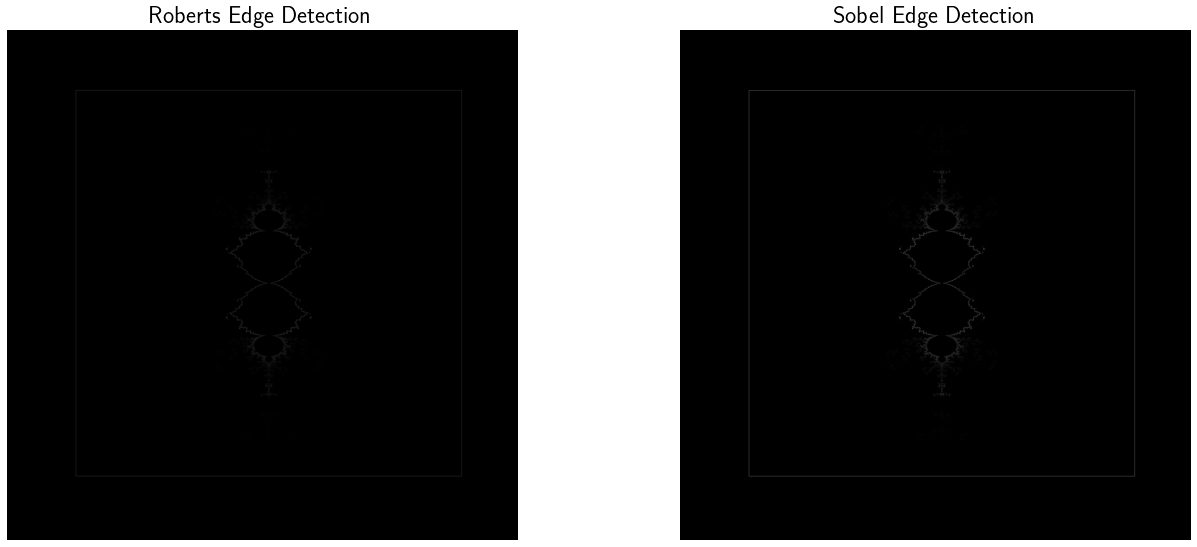

In [55]:
xmin, xmax = -1.51, 1.51
ymin, ymax = -2.01, 2.01
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**3 + z + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 2000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot13.jpg', dpi=600)

plt.imshow(mandelbrot(scale,scale))

lena = rgb2gray(io.imread('Mandelbrot13.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

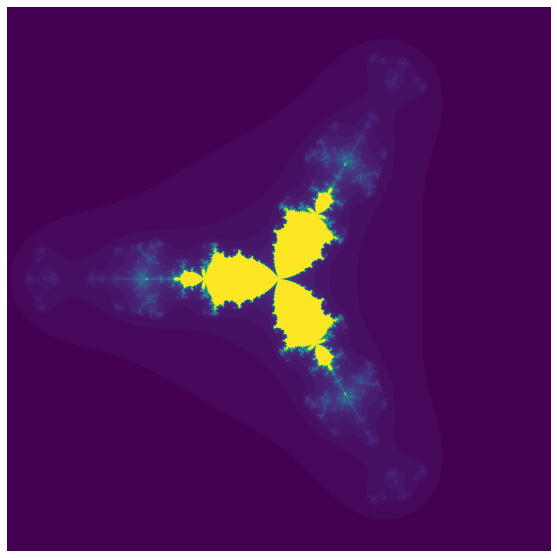

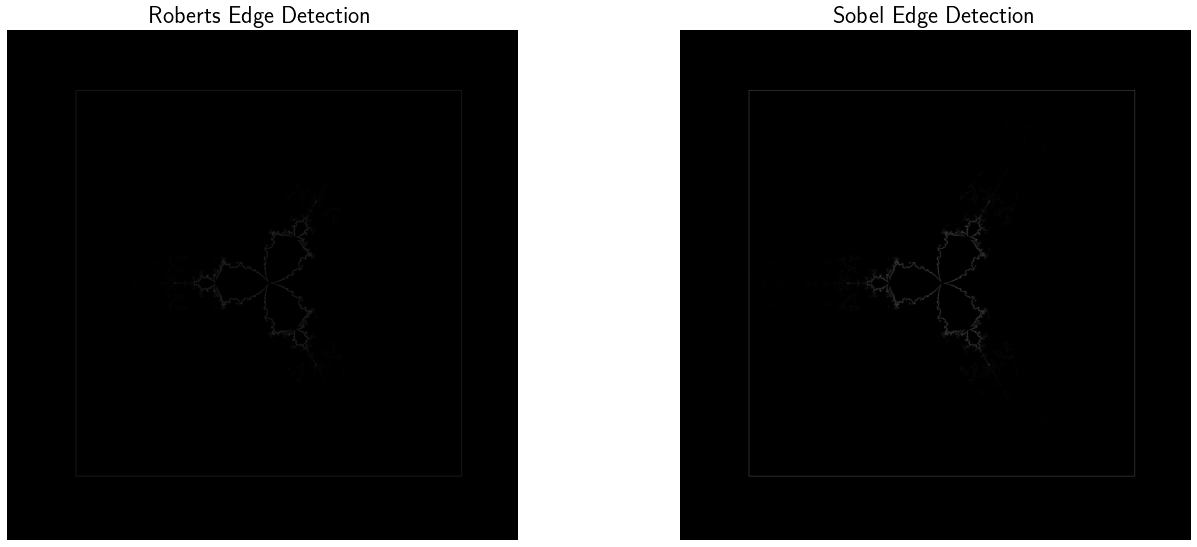

In [56]:
xmin, xmax = -1.51, 1.51
ymin, ymax = -1.51, 1.51
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**4 + z + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 2000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot14A.jpg', dpi=600)

plt.imshow(mandelbrot(scale,scale))

lena = rgb2gray(io.imread('Mandelbrot14A.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

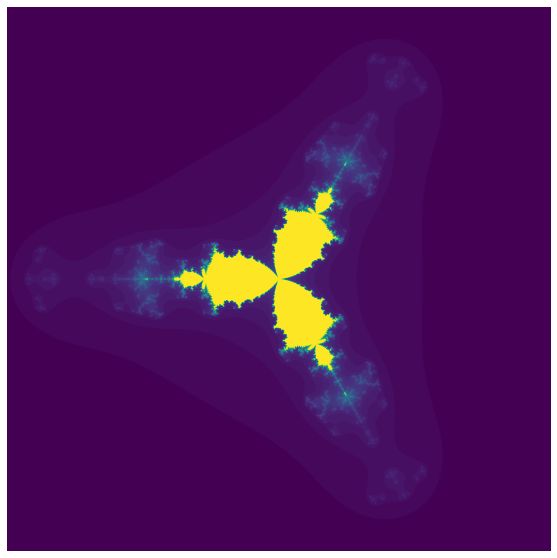

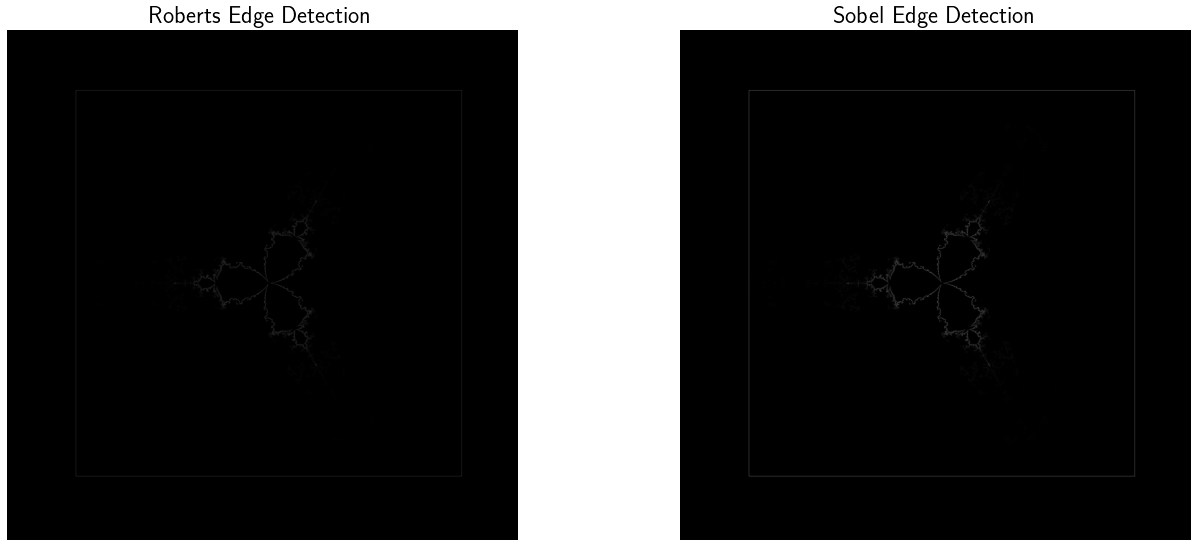

In [57]:
xmin, xmax = -1.51, 1.51
ymin, ymax = -1.51, 1.51
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter-2):
        z = z**4 + z + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 2000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot14.jpg', dpi=600)

plt.imshow(mandelbrot(scale,scale))

lena = rgb2gray(io.imread('Mandelbrot14.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

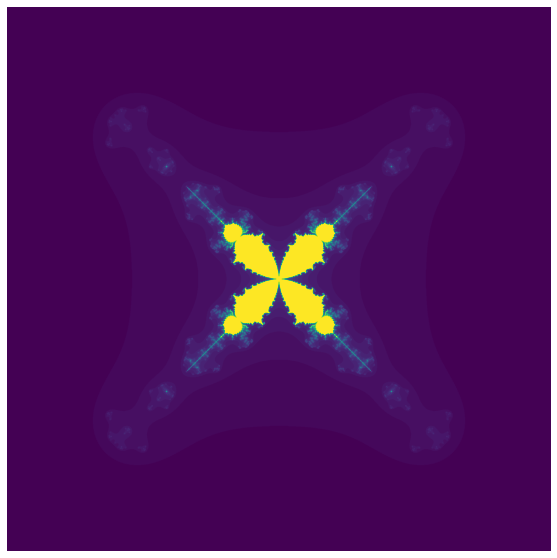

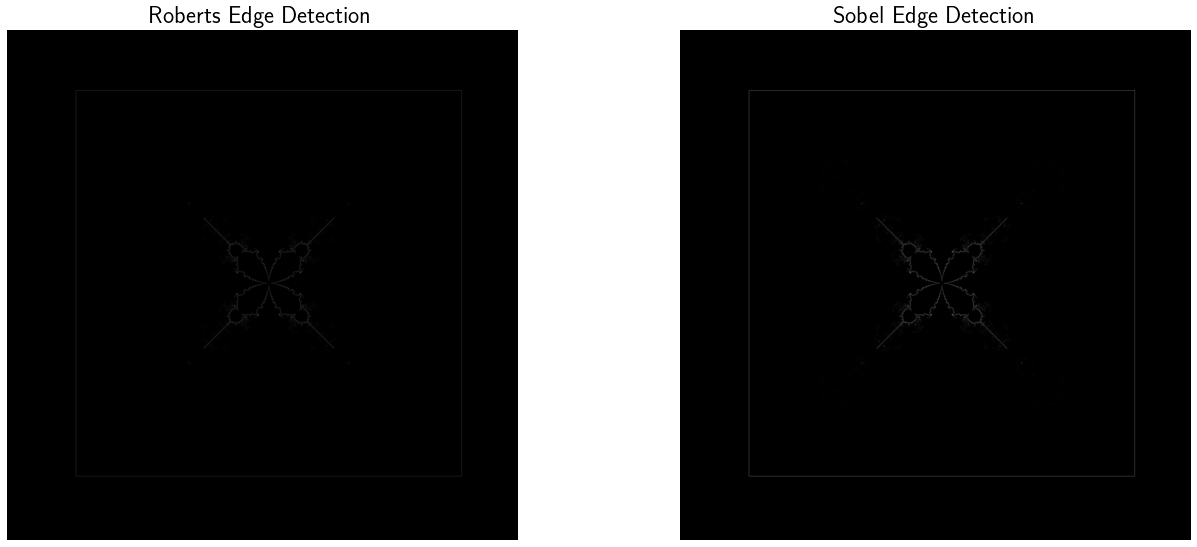

In [58]:
xmin, xmax = -1.51, 1.51
ymin, ymax = -1.51, 1.51
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**5 + z + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 2000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot15.jpg', dpi=600)

plt.imshow(mandelbrot(scale,scale))

lena = rgb2gray(io.imread('Mandelbrot15.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

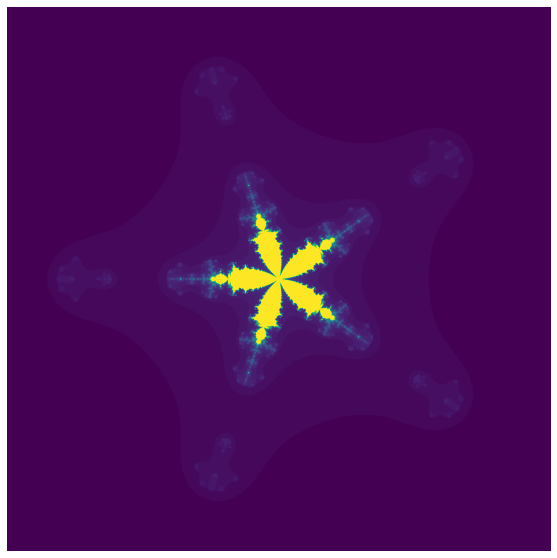

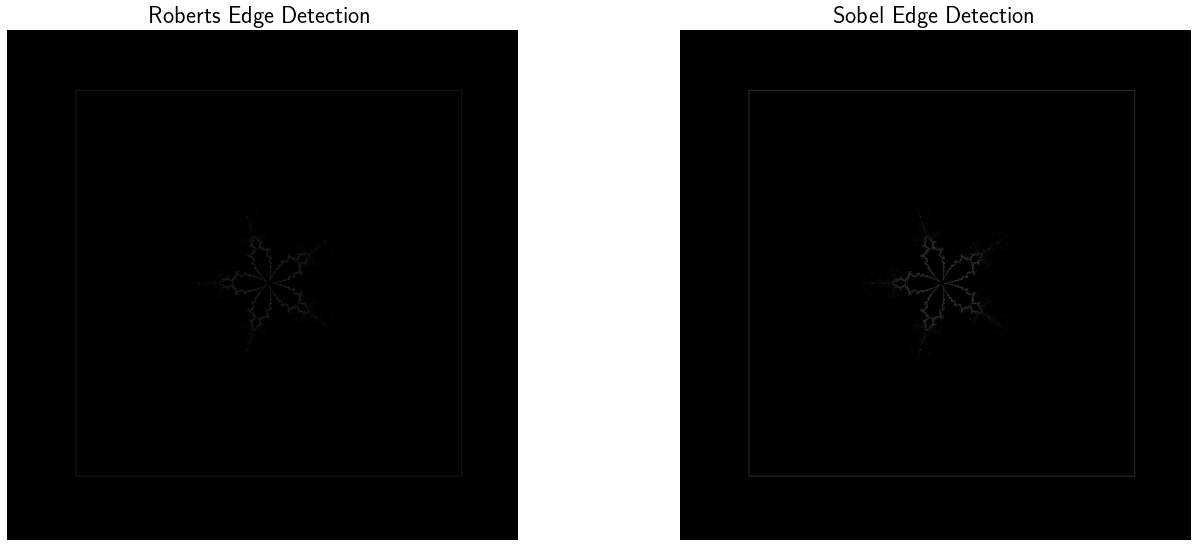

In [59]:
xmin, xmax = -1.51, 1.51
ymin, ymax = -1.51, 1.51
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**6 + z + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 2000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')

plt.savefig('Mandelbrot16.jpg', dpi=600)

plt.imshow(mandelbrot(scale,scale))

lena = rgb2gray(io.imread('Mandelbrot16.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

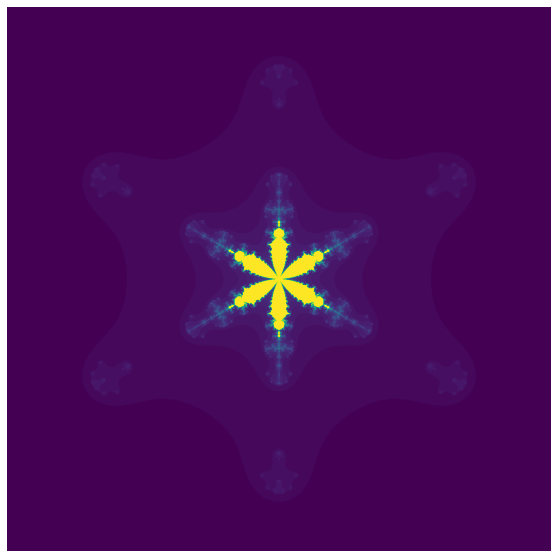

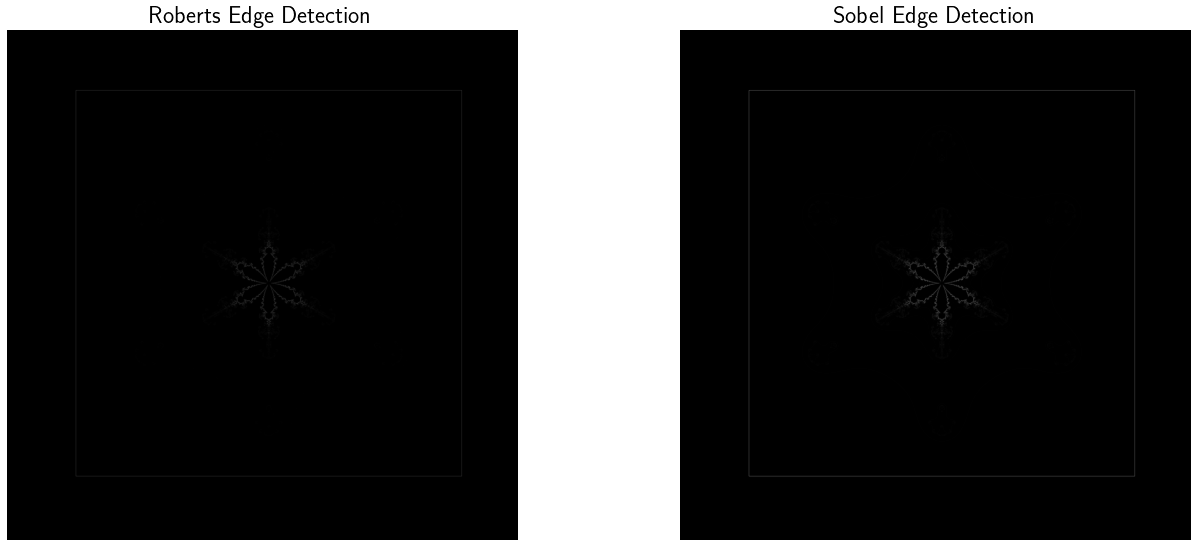

In [60]:
xmin, xmax = -1.51, 1.51
ymin, ymax = -1.51, 1.51
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**7 + z + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 2000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')

plt.savefig('Mandelbrot17.jpg', dpi=600)

plt.imshow(mandelbrot(scale,scale))

lena = rgb2gray(io.imread('Mandelbrot17.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

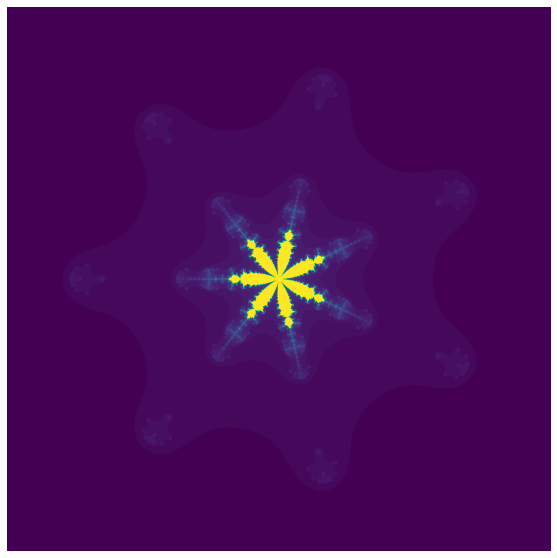

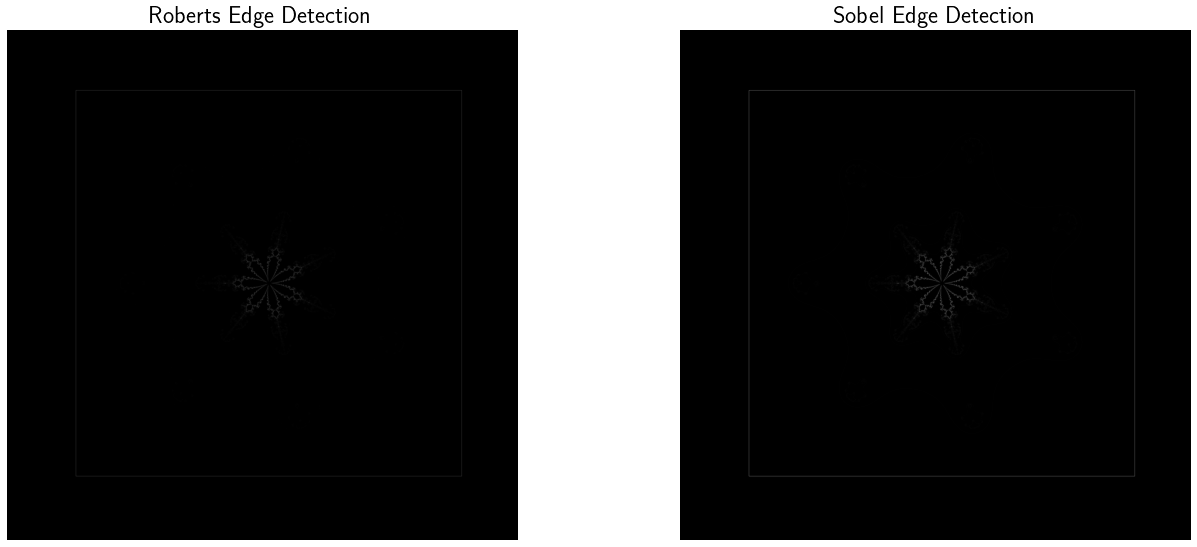

In [61]:
xmin, xmax = -1.51, 1.51
ymin, ymax = -1.51, 1.51
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**8 + z + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 2000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')

plt.savefig('Mandelbrot18.jpg', dpi=600)

plt.imshow(mandelbrot(scale,scale))

lena = rgb2gray(io.imread('Mandelbrot18.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

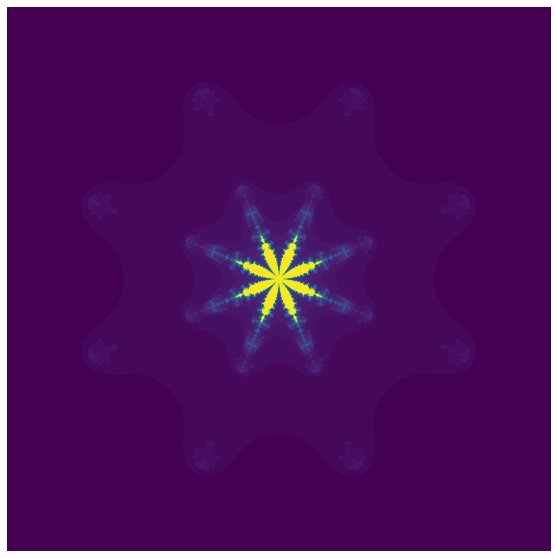

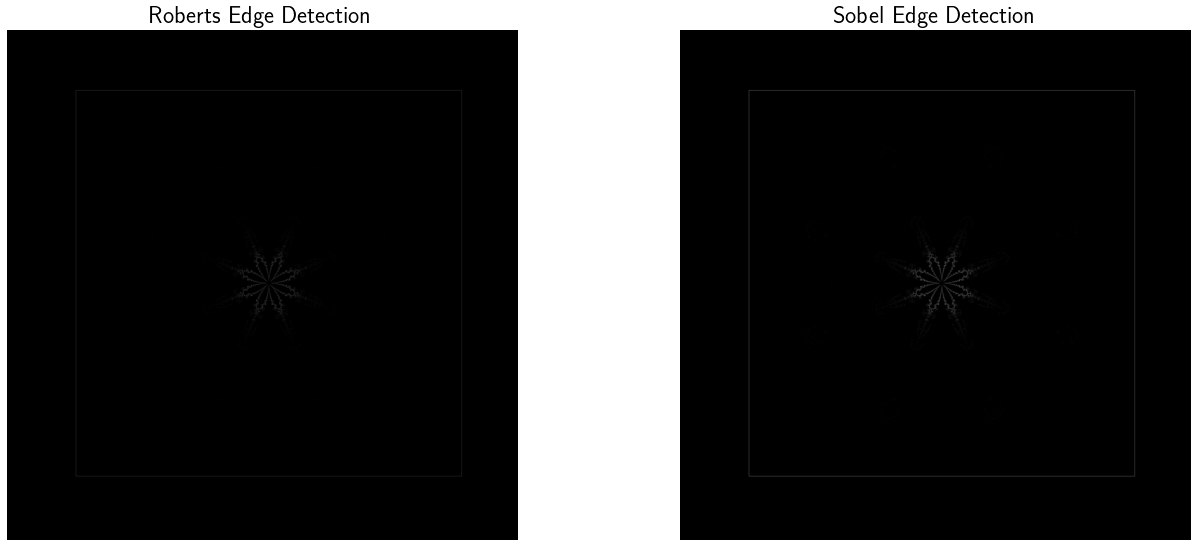

In [62]:
xmin, xmax = -1.51, 1.51
ymin, ymax = -1.51, 1.51
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**9 + z + c
        div_test = z*np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter  # Number of iterations to diverge

scale = 2000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
ax.axis('off')
plt.savefig('Mandelbrot19.jpg', dpi=600)

plt.imshow(mandelbrot(scale,scale))

lena = rgb2gray(io.imread('Mandelbrot19.jpg'))
edge_roberts = roberts(lena)
edge_sobel = sobel(lena)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()